<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Procesamiento Digital de Señales

# Tarea Semanal Nº3
#### Tobías Guerrero

## 1. Introducción

En esta trabajo semanal, se propone simular el comportamiento de un ADC, y verificar cómo el tamaño de palabra y la frecuencia de muestreo afectan a una señal considerada analógica.

Para ello se analizará una senoidal con los siguientes parámetros:

- Frecuencia $f_{0} = f_{S}/N = Δf$
- Amplitud normalizada

Se pide diseñar un bloque cuantizador que opere sobre una señal discreta en tiempo $s_{R}$ de forma tal que para un ADC de B bits y rango $±V_{F}$, el operador $s_{Q} = Q_{B,VF}\{sR\}$ generará una $s_{Q}$ comprendida entre $±V_{F}$ y con valores discretos establecidos por el paso de cuantización $q = \frac{2.VF}{2^{B}−1} ≈ \frac{VF}{2^{B−1}}$ (Volts).

Una vez diseñado el bloque, se visualizarán en una misma gráfica $s_{R}$ y $s_{Q}$, donde se pueda observar que tienen el mismo rango en Volts, para valores de $V_{F}=2 V$ y B = 4, 8 y 16 bits.

Además, se buscará verificar la señal de ruido $e = s_{Q} - s_{R}$, utilizando las descripciones estadísticas vistas en teoría: Distribución uniforme, media, varianza e incorrelación.

## 2. Generación de la señal analógica. Cuantización y cálculo de señal de error

In [65]:
# Librerías a utilizar
import numpy as np
import matplotlib.pyplot as plt

In [66]:
# Función para generar señales desarrollada en la TS1
def mifuncion( modo = "seno" , vmax = 1 , dc = 0 , ff = 1 , ph = 0 , nn = 1000 , fs = 1000 ):
    x = np.linspace(0 , nn/fs , nn) # Genero el array de tiempo
    if modo == "seno":
        y = dc + vmax * np.sin(2*np.pi*ff*x + ph) # Para generar la función senoidal utilizo la función provista por numpy
    elif modo == "cuadrada":
        y = dc + vmax * np.sign(np.sin(2*np.pi*ff*x + ph)) # Para generar una función cuadrada tomo el signo de la función seno
    elif modo == "diente":
        y = dc + 2 * vmax * (x * ff%1) - vmax # Para generar una función diente de sierra utilizo la fórmula de la recta que la representa. Al eje x lo escalo por la frecuencia para que se repita las veces que corresponda
    elif modo == "triangular":
        y = dc + 2 * vmax * (1 - np.abs((x * ff%1) - 0.5) * 2) - vmax ## Para generar una función triangular utilizo la fórmula que la representa. Al eje x lo escalo por la frecuencia para que se repita las veces que corresponda
    return x,y

In [116]:
# Función de cuantización
def cuantizar(x , vf = 1, b = 4):
    nn = len(x)
    # Salto de cuantización
    q = vf / (2**(b-1))
    print(q)
    # Arrays de señal cuantizada y error
    sq = np.zeros(len(sr))
    e = np.zeros(len(sr))
    for i in range(nn):
        sq[i] = round(sr[i]/q)*q
        # Verifico saturación
        if sq[i] > vf:
            sq[i] = vf
        elif sq[i] < -vf:
            sq[i] = -vf
        e[i] = sq[i] - sr[i]
    return sq , e

In [107]:
# Parámetros del ADC
vf = 2
b1 = 4
b2 = 8
b3 = 16

# Parámetros de la senoidal
modo = "seno"
nn = 100
fs = nn
frec = fs / nn

# Generación de la senoidal
t , sr = mifuncion( modo , ff =  frec , nn = nn , fs = fs )

## 3. Gráficos de señales analógica y cuantizada para B = 4, 8 y 16 bits

0.25


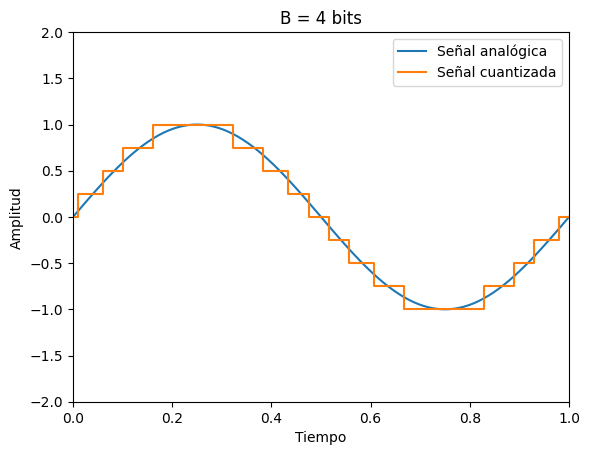

In [108]:
# Cuantización
sq , e = cuantizar(sr , vf , b1)

plt.plot(t,sr,label='Señal analógica')
# Para graficar la señal cuantizada se utiliza la señal step para visualizar mejor los saltos de cuantización
plt.step(t,sq,label='Señal cuantizada')
plt.xlim(0,1)
plt.ylim(-vf,vf)
plt.title('B = 4 bits')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend(loc='upper right')

0.015625


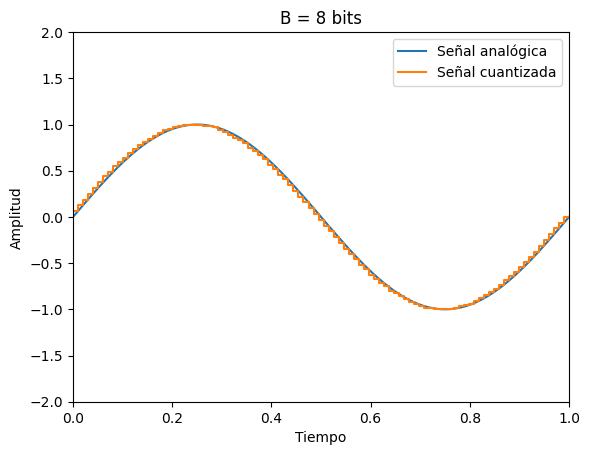

In [110]:
# Cuantización
sq , e = cuantizar(sr , vf , b2)

plt.plot(t,sr,label='Señal analógica')
# Para graficar la señal cuantizada se utiliza la señal step para visualizar mejor los saltos de cuantización
plt.step(t,sq,label='Señal cuantizada')
plt.xlim(0,1)
plt.ylim(-vf,vf)
plt.title('B = 8 bits')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend(loc='upper right')

6.103515625e-05


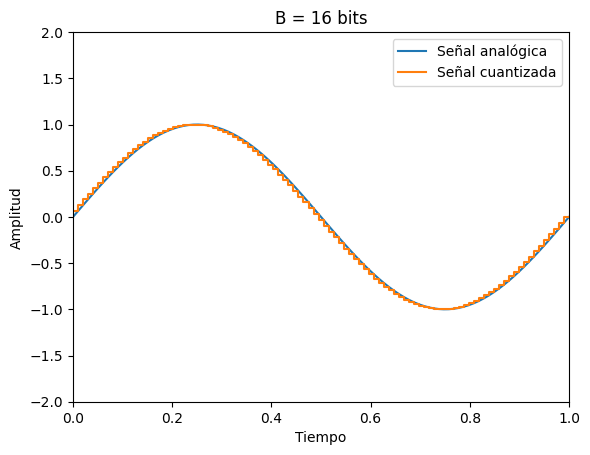

In [112]:
# Cuantización
sq , e = cuantizar(sr , vf , b3)


plt.plot(t,sr,label='Señal analógica')
# Para graficar la señal cuantizada se utiliza la señal step para visualizar mejor los saltos de cuantización
plt.step(t,sq,label='Señal cuantizada')
plt.xlim(0,1)
plt.ylim(-vf,vf)
plt.title('B = 16 bits')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend(loc='upper right')

## 4. Efecto de la saturación

6.103515625e-05


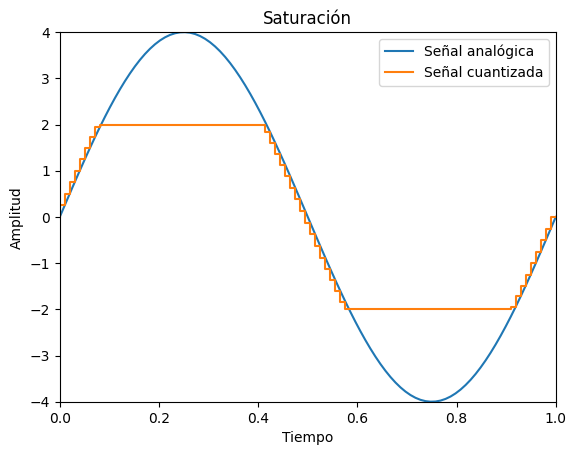

In [118]:
t , sr = mifuncion( modo , vmax = 4 , ff =  frec , nn = nn , fs = fs )

sq , e = cuantizar(sr , vf , b3)


plt.plot(t,sr,label='Señal analógica')
# Para graficar la señal cuantizada se utiliza la señal step para visualizar mejor los saltos de cuantización
plt.step(t,sq,label='Señal cuantizada')
plt.xlim(0,1)
plt.ylim(-4,4)
plt.title('Saturación')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend(loc='upper right')

## 5. Análisis de la señal de error

0.25


(array([ 9.,  8.,  9., 11., 12., 14., 11.,  9.,  8.,  9.]),
 array([-1.23407546e-01, -9.87260371e-02, -7.40445279e-02, -4.93630186e-02,
        -2.46815093e-02, -1.11022302e-16,  2.46815093e-02,  4.93630186e-02,
         7.40445279e-02,  9.87260371e-02,  1.23407546e-01]),
 <BarContainer object of 10 artists>)

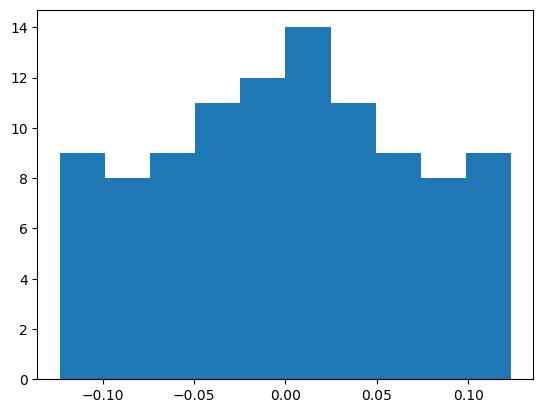

In [120]:
# Vuelvo a la senoidal de amplitud unitaria
t , sr = mifuncion( modo , ff =  frec , nn = nn , fs = fs )

# Analizo el error de una señal cuantizada con 4 bits
sq , e = cuantizar(sr , vf , b1)

# Para verificar la distribución de la señal de error, se realiza un histograma de la misma
plt.hist(e)

Se observa que los valores se acumulan alrededor de 0 y hasta una distancia de $0.125 = \frac{q}{2}$. Se observan que hay valores de error que aparecen más veces que otros, pero estas diferencias son pequeñas. Se podría afirmar que si se aumenta el número de muestras lo suficiente, la distribución tiende a ser uniforme, como se esperaría.

In [122]:
# El cálculo de la media se realiza como el promedio de todas las muestras
media = sum(e)/len(e)
print(media)

1.1886189307608537e-17


La media de una distribución uniforme es $\frac{a + b}{2}$. Siendo que en este caso se tiene que $a = -b$, se espera que la media de 0. Esta hipótesis es coherente con lo calculado en la celda anterior.

In [126]:
# El cálculo de la varianza se realiza con ayuda de la función de numpy
varianza = np.var(e)
print(varianza)

0.004566146421324509


La varianza de una distribución uniforme es $\frac{(b - a)^{2}}{12}$. Siendo $a = -b = 0.125$, la varianza sería de $0.005028$. El resultado obtenido en la celda anterior, si bien está un poco alejado, se considera coherente.

El análisis de incorrelación se realizón con ayuda de la herramienta de IA Perplexity. El hilo completo puede verse en el siguiente enlace: https://www.perplexity.ai/search/buenas-tardes-como-puedo-hacer-rJPu0VhySbaJyN.6Rzstkg?login-source=visitorGate

A continuación, se copia el código que se obtuvo mediante la herramienta para calcular la autocorrelación de la señal.

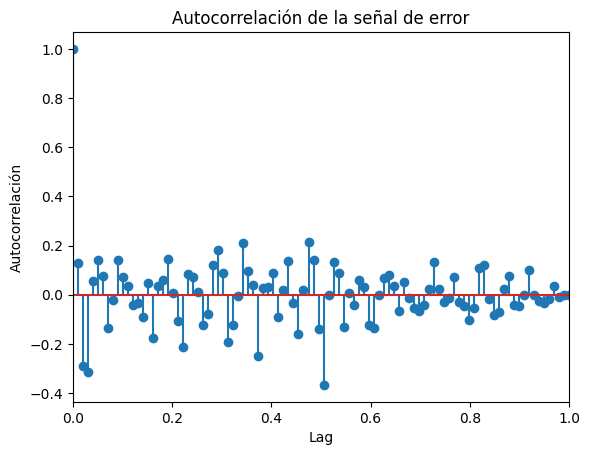

In [127]:
# Calcular la autocorrelación
autocorrelacion = np.correlate(e, e, mode='full')
# Tomar solo la mitad positiva
autocorrelacion = autocorrelacion[autocorrelacion.size // 2:]  

# Normalizar
autocorrelacion /= np.max(autocorrelacion)

# Graficar
plt.stem(t,autocorrelacion)
plt.title('Autocorrelación de la señal de error')
plt.xlabel('Lag')
plt.xlim(0,1)
plt.ylabel('Autocorrelación')
plt.show()

Se observa que la autocorrelación en el lag 0 es 1, lo cual es correcto. En lo siguientes lags, la autocorrelación debería dar 0 o muy cercana. Sin embargo, se observan valores que, si bien son menores que 1, también son lejanos a 0, lo que indica que la señal de error generada no es perfectamente incorrelada.

## 6. Conclusiones

En el presente trabajo se pudo desarrollar una función que cuantice una señal analógica, imitando el comportamiento de un ADC, a partir de sus parámetros. A partir de esto, se pudo realizar un análisis tanto del proceso como de las señales cuantizada y de error obtenidas, lo cual permitió un mayor entendimiento en la materia. Además, se logró vincular este trabajo semanal con los anteriores, en particular con el primero, del cual se utilizó el generador de señales desarrollado.